In [1]:
# Imported libraries
import pydicom
import matplotlib.pyplot as plt
import numpy as np
import sys
import matplotlib as mpl
import imageio
import cv2
import sys
import os
import pickle

In [4]:
# Function to be used for sampling images
def downSample(pickle_file):
    final_patient_data = []
    seg_final_array = []
    original_seg_array = pickle_file[4]
    for scan in range(len(pickle_file)):
        scan_seg = []
        if scan != 4:
            scan_type_array = []
            array_seg = []
            for array in range(len(pickle_file[scan])):
                new_array = cv2.resize(pickle_file[scan][array], dsize=(256,256), interpolation=cv2.INTER_CUBIC)
                scan_type_array.append(new_array)
                designated_seg_arr = original_seg_array[scan][:,:,array]
                resized_seg = cv2.resize(designated_seg_arr, dsize=(256,256), interpolation=cv2.INTER_CUBIC)
                array_seg.append(resized_seg)
            seg_final_array.append(array_seg)
            final_patient_data.append(scan_type_array)
    final_patient_data.append(seg_final_array)
    return final_patient_data

In [5]:
pickle_file_dir = '/home/omar/Desktop/TrainingResult_dup/'
pickle_files = os.listdir(pickle_file_dir)

result_dir = '/home/omar/Desktop/sampled_output'
os.chdir(result_dir)

for file in pickle_files:
    reading_data = open("%s" % (pickle_file_dir+file), "rb")
    patient_data = pickle.load(reading_data)
    if patient_data[0][0].shape != (256,256):
        generated_patient_pickle = open("%s" % (file) ,"wb")
        new_sampled_data = downSample(patient_data)
        pickle.dump(new_sampled_data, generated_patient_pickle)
        generated_patient_pickle.close()
    else:
        generated_patient_pickle = open("%s" % (file) ,"wb")
        data = []
        seg_final_array = []
        for scan in range(len(patient_data)):
            scan_seg = []
            if scan != 4:
                scan_type_array = []
                array_seg = []
                for array in range(len(patient_data[scan])):
                    scan_type_array.append(patient_data[scan][array])
                    designated_seg_arr = patient_data[4][scan][:,:,array]
                    array_seg.append(designated_seg_arr)
                seg_final_array.append(array_seg)
                data.append(scan_type_array)
        data.append(seg_final_array)
        pickle.dump(data, generated_patient_pickle)
        generated_patient_pickle.close()


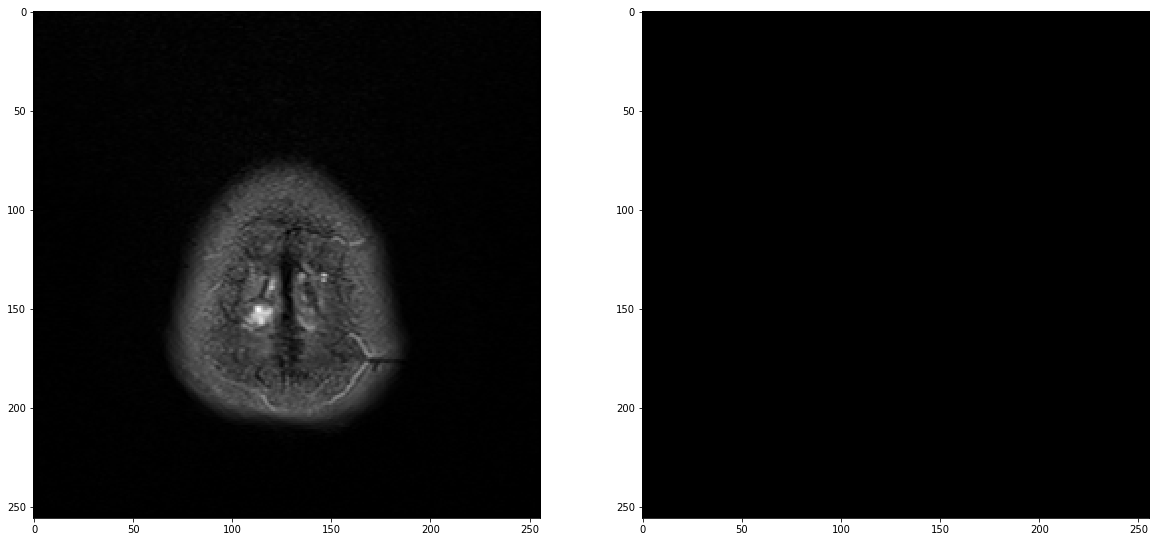

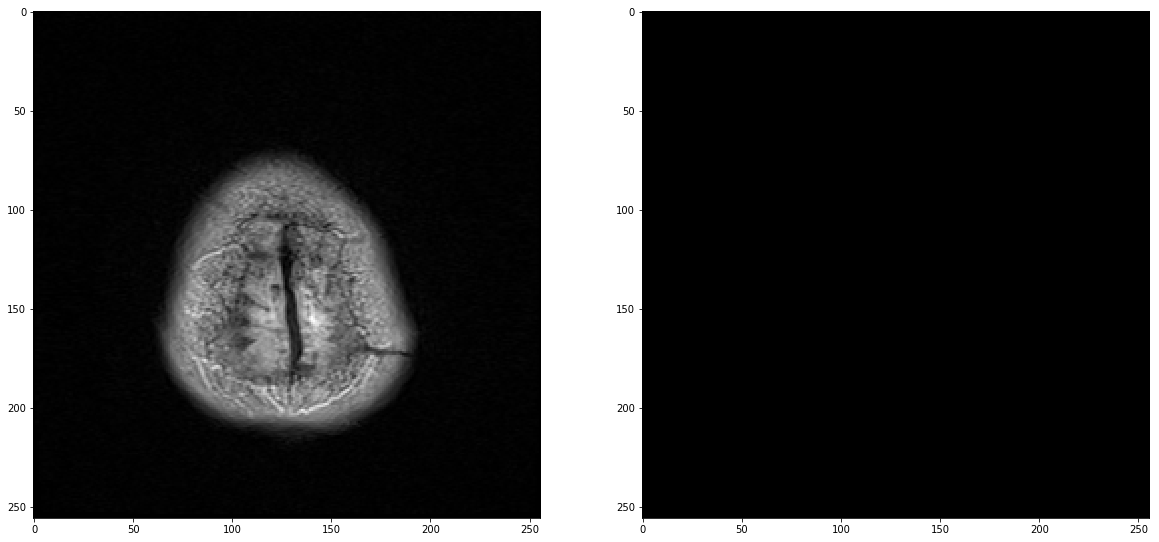

In [2]:
# # Implementation completed. Now comes the result testing
# Needs proofviewing - 'TCGA-19-2624.pickle' - 'TCGA-06-0149.pickle' - 'TCGA-76-6657.pickle' (3rd scan)
# 'TCGA-12-0616.pickle' - 'TCGA-19-5960.pickle' - 'TCGA-02-0006.pickle'
output_dir = '/home/omar/Desktop/sampled_output/'
output_pickles = os.listdir(output_dir)

# Plotting all the final sampled patients to make sure data is intact
# for file in output_pickles:
#     reading_data = open("%s" % (output_dir+file), "rb")
#     patient_data = pickle.load(reading_data)    
# #     Plotting area
#     for scan in range(len(patient_data)):
#         if scan != 4:
#             for array in range(len(patient_data[scan])):
#                 plt.figure(figsize=(20,10))
#                 plt.subplot(121)
#                 plt.imshow(np.squeeze(patient_data[scan][array]), 'gray')
#                 plt.subplot(122)
#                 plt.imshow(np.squeeze(patient_data[4][scan][array]), 'gray')
#                 plt.show()
#                 if (array==4):
#                     break
#             print ("-----------------")
#     print("__________________________________________________________________")
file_to_check = 'TCGA-19-5960.pickle'
# original_pre_sample_dir = '/home/omar/Desktop/TrainingResult_dup/'
# file = original_pre_sample_dir+file_to_check
# file = output_dir+file_to_check
# pick = open("%s" % (file), "rb")
# data = pickle.load(pick)
# for scan in range(2):
#     for arr in range(1):
#         plt.figure(figsize=(20,10))
#         plt.subplot(121)
#         plt.imshow(np.squeeze(data[scan][arr]), 'gray')
#         plt.subplot(122)
#         plt.imshow(np.squeeze(data[4][scan][arr]), 'gray')
#         plt.show()